# Importing and preparing data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import layers
import keras
 
%matplotlib inline
tf.random.set_seed(42)

In [2]:
df = pd.read_csv('../input/mobile-health/mhealth_raw_data.csv')
df

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.449020,-1.01030,0.034483,0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.449020,-1.01030,0.034483,0,subject1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.449020,-1.01030,0.034483,0,subject1
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.456860,-1.00820,0.025862,0,subject1
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.456860,-1.00820,0.025862,0,subject1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215740,1.7849,-9.8287,0.29725,-0.341370,-0.90056,-0.61493,-3.7198,-8.9071,0.294230,0.041176,-0.99384,-0.480600,0,subject10
1215741,1.8687,-9.8766,0.46236,-0.341370,-0.90056,-0.61493,-3.7160,-8.7455,0.448140,0.041176,-0.99384,-0.480600,0,subject10
1215742,1.6928,-9.9290,0.16631,-0.341370,-0.90056,-0.61493,-3.8824,-9.1155,0.450480,0.041176,-0.99384,-0.480600,0,subject10
1215743,1.5279,-9.6306,0.30458,-0.341370,-0.90056,-0.61493,-3.5564,-9.1441,0.594880,0.041176,-0.99384,-0.480600,0,subject10


In [3]:
from sklearn.utils import resample
 
df_majority = df[df.Activity==0]
df_minorities = df[df.Activity!=0]
 
df_majority_downsampled = resample(df_majority,n_samples=30000, random_state=42)
df = pd.concat([df_majority_downsampled, df_minorities])
df.Activity.value_counts()

11    30720
10    30720
9     30720
5     30720
4     30720
3     30720
2     30720
1     30720
0     30000
7     29441
8     29337
6     28315
12    10342
Name: Activity, dtype: int64

In [4]:
#Dropping feature have data outside 98% confidence interval
df1 = df.copy()
for feature in df1.columns[:-2]:
  lower_range = np.quantile(df[feature],0.01)
  upper_range = np.quantile(df[feature],0.99)
  print(feature,'range:',lower_range,'to',upper_range)

  df1 = df1.drop(df1[(df1[feature]>upper_range) | (df1[feature]<lower_range)].index, axis=0)
  print('shape',df1.shape)

alx range: -11.473120000000002 to 19.233
shape (365733, 14)
aly range: -19.378999999999998 to 2.4478719999999976
shape (359934, 14)
alz range: -18.95 to 14.19623999999999
shape (356240, 14)
glx range: -0.74212 to 0.80705
shape (349347, 14)
gly range: -1.0694 to 0.96623
shape (342811, 14)
glz range: -1.1061 to 0.8290799999999999
shape (337361, 14)
arx range: -21.492 to 9.097647999999998
shape (332280, 14)
ary range: -18.694000000000006 to 11.948059999999998
shape (326215, 14)
arz range: -10.367 to 11.823119999999996
shape (323650, 14)
grx range: -1.0196 to 0.95686
shape (320165, 14)
gry range: -1.1417 to 0.90965
shape (315329, 14)
grz range: -0.69828 to 1.125
shape (310906, 14)


In [5]:
label_map = {
    0: 'Nothing',
    1: 'Standing still',  
    2: 'Sitting and relaxing', 
    3: 'Lying down',  
    4: 'Walking',  
    5: 'Climbing stairs',  
    6: 'Waist bends forward',
    7: 'Frontal elevation of arms', 
    8: 'Knees bending (crouching)', 
    9: 'Cycling', 
    10: 'Jogging', 
    11: 'Running', 
    12: 'Jump front & back' 
}

# Modeling Data Preparation

Follow this ****[notebook](https://www.kaggle.com/gaurav2022/eda-dataviz-resample/)**** to see how I select time frame for model data preparation.

In [6]:
#spliting data into train and test set
print(df1.shape)
train = df1[(df1['subject'] != 'subject10') & (df1['subject'] != 'subject9')]
test = df1.drop(train.index, axis=0)
train.shape,test.shape

(310906, 14)


((246483, 14), (64423, 14))

In [7]:
X_train = train.drop(['Activity','subject'],axis=1)
y_train = train['Activity']
X_test = test.drop(['Activity','subject'],axis=1)
y_test = test['Activity']
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((246483, 12), (246483,), (64423, 12), (64423,))

In [8]:
from scipy import stats

#function to create time series datset for seuence modeling
def create_dataset(X, y, time_steps, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        x = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(x)
        ys.append(stats.mode(labels)[0][0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)

In [9]:
X_train,y_train = create_dataset(X_train, y_train, 100, step=50)
X_train.shape, y_train.shape

((4928, 100, 12), (4928, 1))

In [10]:
X_test,y_test = create_dataset(X_test, y_test, 100, step=50)
X_test.shape, y_test.shape

((1287, 100, 12), (1287, 1))

# Model building

In [11]:
pip install tensorflow-addons


You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [12]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

model = keras.Sequential()

# Input Layer
model.add(layers.Input(shape=[100, 12]))

# First Conv1D Layer with increased filters and kernel size
model.add(layers.Conv1D(filters=128, kernel_size=5, padding="same", activation='relu', kernel_regularizer=l2(0.0001)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))  # Increased dropout to reduce overfitting

# Second Conv1D Layer with more filters
model.add(layers.Conv1D(filters=256, kernel_size=3, padding="same", activation='relu', kernel_regularizer=l2(0.0001)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))  # Increased dropout

# MaxPool1D for dimensionality reduction
model.add(layers.MaxPool1D(pool_size=2))

# Add Bidirectional LSTM with increased size
model.add(layers.Bidirectional(layers.LSTM(256, return_sequences=True)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))  # Increased dropout

# GlobalMaxPooling1D for better feature extraction
model.add(layers.GlobalMaxPooling1D())

# Dense layer with L2 regularization and increased units
model.add(layers.Dense(512, activation='relu', kernel_regularizer=l2(0.0001)))
model.add(layers.Dropout(0.5))  # Increased dropout

# Output Layer with 13 classes (softmax)
model.add(layers.Dense(13, activation='softmax'))

# Print the model summary
model.summary()

# Optimizer with learning rate decay
optimizer = Adam(learning_rate=0.0001)

# Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 100, 128)          7808      
_________________________________________________________________
batch_normalization (BatchNo (None, 100, 128)          512       
_________________________________________________________________
dropout (Dropout)            (None, 100, 128)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 100, 256)          98560     
_________________________________________________________________
batch_normalization_1 (Batch (None, 100, 256)          1024      
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 256)          0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 50, 256)           0

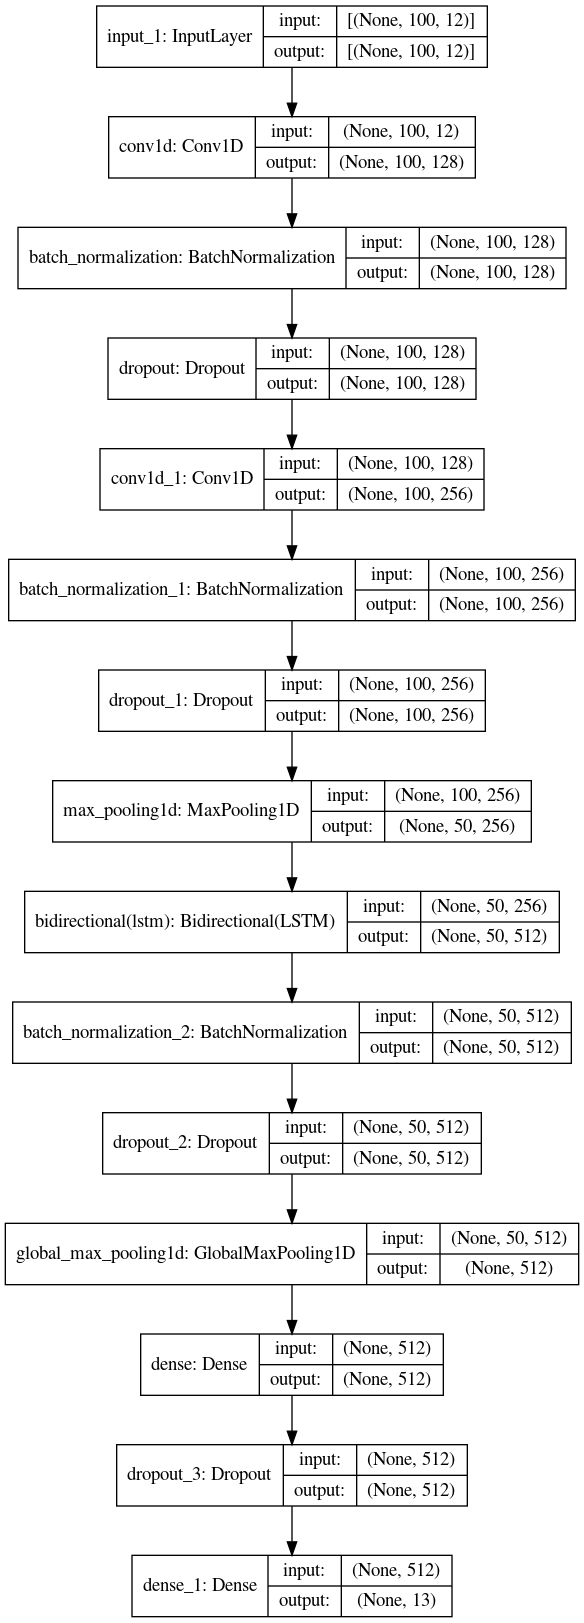

In [13]:
import tensorflow as tf

# Plot the model with input/output shapes
tf.keras.utils.plot_model(model, show_shapes=True)


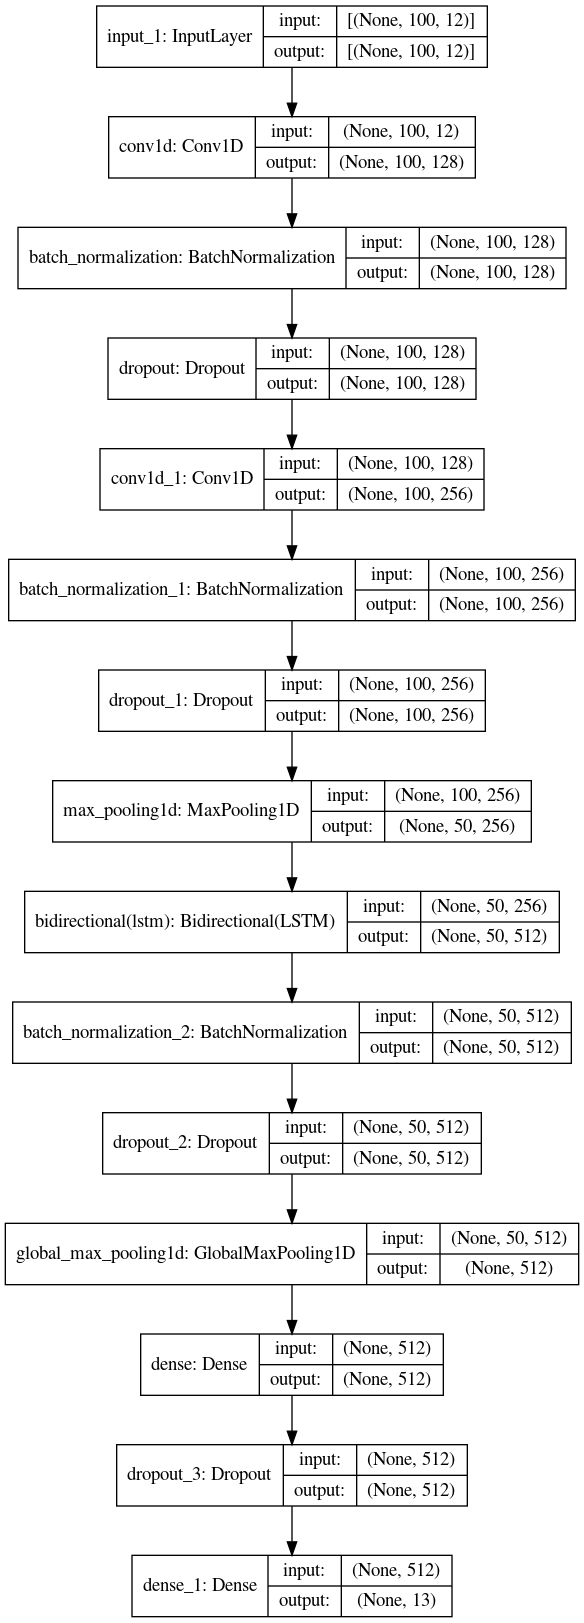

In [14]:

import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)

In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler
from tensorflow.keras.optimizers import Adam

# Learning Rate Decay function
def scheduler(epoch, lr):
    if epoch > 50:  # After 10 epochs, decay the learning rate by 10%
        return lr * 0.9
    return lr

# Learning rate scheduler and early stopping
lr_scheduler = LearningRateScheduler(scheduler, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True, verbose=1)

# ModelCheckpoint to save the best model based on validation loss
callbacks = [
    ModelCheckpoint("mhealth_best.h5", save_best_only=True, monitor="val_loss", verbose=1),
    early_stopping,
    lr_scheduler
]

# Compile the model (Adam optimizer, sparse categorical cross-entropy loss, sparse categorical accuracy metric)
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss="sparse_categorical_crossentropy", 
              metrics=["sparse_categorical_accuracy"])

# Train the model with the adjusted callbacks
model_history = model.fit(
    X_train, y_train,
    epochs=100,  # Adjust number of epochs based on your requirements
    validation_data=(X_test, y_test),
    batch_size=32,
    callbacks=callbacks
)


Epoch 1/100

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
154/154 [==============================] - 9s 21ms/step - loss: 1.5224 - sparse_categorical_accuracy: 0.7090 - val_loss: 0.7503 - val_sparse_categorical_accuracy: 0.7879

Epoch 00001: val_loss improved from inf to 0.75031, saving model to mhealth_best.h5
Epoch 2/100

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
154/154 [==============================] - 2s 15ms/step - loss: 0.1815 - sparse_categorical_accuracy: 0.9607 - val_loss: 0.1936 - val_sparse_categorical_accuracy: 0.9674

Epoch 00002: val_loss improved from 0.75031 to 0.19360, saving model to mhealth_best.h5
Epoch 3/100

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
154/154 [==============================] - 2s 15ms/step - loss: 0.1486 - sparse_categorical_accuracy: 0.9754 - val_loss: 0.1714 - val_sparse_categorical_accuracy: 0.9689

Epoch 00003: val_loss im

# Model Evaluation

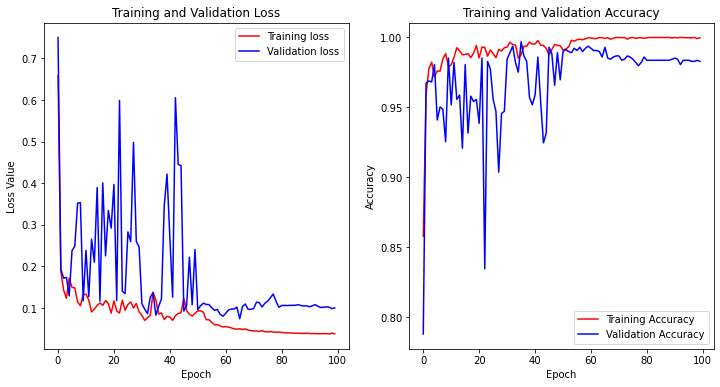

In [16]:
train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
train_accuracy = model_history.history['sparse_categorical_accuracy']
val_accuracy = model_history.history['val_sparse_categorical_accuracy']

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(train_loss, 'r', label='Training loss')
plt.plot(val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend()

plt.subplot(1,2,2)
plt.plot(train_accuracy, 'r', label='Training Accuracy')
plt.plot(val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [17]:
model = keras.models.load_model('./mhealth_best.h5')

train_loss, train_acc = model.evaluate(X_train,y_train)
test_loss, test_acc = model.evaluate(X_test,y_test)

print("Train accuracy", round(train_acc*100, 2),'%')
print("Train loss", train_loss)
print("Test accuracy", round(test_acc*100, 2),'%')
print("Test loss", test_loss)

41/41 [==============================] - 1s 5ms/step - loss: 0.0741 - sparse_categorical_accuracy: 0.9930
Train accuracy 100.0 %
Train loss 0.047799624502658844
Test accuracy 99.3 %
Test loss 0.07412564754486084


In [18]:
pred = model.predict(X_test)
pred = np.argmax(pred, axis = 1)
pred = pred.reshape(-1,1)

In [19]:
pred.shape,y_test.shape

((1287, 1), (1287, 1))

In [20]:
from sklearn.metrics import confusion_matrix, classification_report
 
print(classification_report(y_test,pred))
print('*'*50)
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       0.99      1.00      1.00       122
           2       1.00      0.98      0.99       124
           3       0.99      1.00      1.00       122
           4       0.98      1.00      0.99       120
           5       1.00      1.00      1.00        84
           6       0.99      0.98      0.99       106
           7       1.00      0.99      1.00       112
           8       0.99      0.98      0.99       116
           9       0.99      0.99      0.99       121
          10       0.98      1.00      0.99        89
          11       1.00      0.98      0.99        52
          12       1.00      1.00      1.00        27

    accuracy                           0.99      1287
   macro avg       0.99      0.99      0.99      1287
weighted avg       0.99      0.99      0.99      1287

**************************************************
[[ 92   0   0   0   0   0   

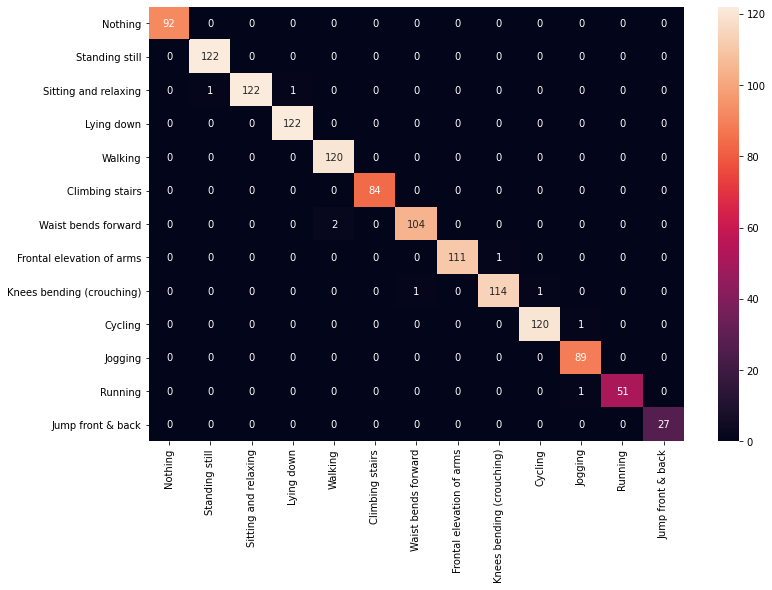

In [21]:
plt.figure(figsize=(12,8))
conf_matrix = confusion_matrix(y_test,pred)
sns.heatmap(conf_matrix, xticklabels= label_map.values(), yticklabels= label_map.values(), annot=True, fmt="d")
plt.show()

Model performs really well on almost all activities but confuses between sitting and lying down. This would be solved by doing feature engineering, that will be the future task. 